# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

[**Ответ**] Для воспроизводимости

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
from IPython.display import display

In [5]:
display(df_test.head())

df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [6]:
display(df_train.isna().sum().loc[lambda x: x>0])

df_test.isna().sum().loc[lambda x: x>0]

,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


In [7]:
print(f'Train duplicated: {df_train.duplicated().sum()}\nTest duplicated: {df_test.duplicated().sum()}')

Train duplicated: 985
Test duplicated: 62


In [8]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

# from ydata_profiling import ProfileReport
# from google.colab import files

# profile_report = ProfileReport(df_train)

# profile_report.to_file('car_selling_price_report.html')

# files.download('car_selling_price_report.html')

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
df_train.dtypes.to_frame().T

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,object,int64,int64,int64,object,object,object,object,object,object,object,object,float64


In [10]:
df_train[['mileage', 'engine', 'max_power']].head()

,mileage,engine,max_power
0,23.4 kmpl,1248 CC,74 bhp
1,21.14 kmpl,1498 CC,103.52 bhp
2,23.0 kmpl,1396 CC,90 bhp
3,16.1 kmpl,1298 CC,88.2 bhp
4,20.14 kmpl,1197 CC,81.86 bhp


In [11]:
# имеем пропуски в толбцах 'mileage', 'engine', 'max_power', 'torque', 'seats'
# при этом все, кроме 'seats', имеют тип данных 'object'
# удалим в столбцах 'mileage', 'engine', 'max_power' единицы измерения и приведем к числовому типу (Задание 3)
# 'torque' не преобразовываем (согласно Заданию 3)

def float_or_nan(x):
    try:
        val = float(str(x))
    except ValueError:
        return np.nan
    else:
        return val

for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].str.strip().str.split().str[0].apply(float_or_nan).astype('float64')
    df_test[col] = df_test[col].str.strip().str.split().str[0].apply(float_or_nan).astype('float64')

df_train[['mileage', 'engine', 'max_power']].head()

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,23.00,1396.0,90.00
3,16.10,1298.0,88.20
4,20.14,1197.0,81.86


In [12]:
# убеждаемся, что колонки с пропусками (кроме 'torque') теперь имеют числовой тип данных
# кол-во пропущенных значений в 'max_power' увеличилось на 1, т.к. одна запись содержала только единицу измерения без самого значения

pd.concat((df_train.isna().sum().rename('na_count'), df_train.dtypes.rename('dtype')), axis=1).loc[lambda df: df['na_count']>0]

,na_count,dtype
mileage,202,float64
engine,202,float64
max_power,197,float64
torque,203,object
seats,202,float64


In [13]:
# теперь можем заполнить пропущенные значения в числовых столбцах медианой по трейну

for col_w_na in pd.concat((df_train, df_test)).select_dtypes('number').isna().sum().loc[lambda x: x>0].index:
    med = df_train[col_w_na].median()
    df_train[col_w_na] = df_train[col_w_na].fillna(med)
    df_test[col_w_na] = df_test[col_w_na].fillna(med)

# проверим, что пропущенных значений не осталось ни в трейне, ни в тесте

pd.concat((df_train, df_test)).select_dtypes('number').isna().sum()

,0
year,0
selling_price,0
km_driven,0
mileage,0
engine,0
max_power,0
seats,0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [14]:
df_train.drop('selling_price', axis=1).duplicated().sum()

1159

In [15]:
df_train.drop('selling_price', axis=1).loc[lambda df: df.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [16]:
df_train = df_train.drop_duplicates(subset=df_train.columns.drop('selling_price'), keep='first').reset_index(drop=True)

In [17]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [18]:
# первая часть в Задании 1

df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [19]:
for col in ['engine', 'seats']:
    df_train[col] = df_train[col].astype('int64')
    df_test[col] = df_test[col].astype('int64')

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [20]:
display(df_train.describe(include='number').round(2))
df_test.describe(include='number').round(2)

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,2013.43,522960.09,73952.24,19.43,1429.45,87.91,5.43
std,4.10,535432.00,60071.14,3.99,485.66,31.64,0.98
min,1983.00,29999.00,1.00,0.00,624.00,0.00,2.00
25%,2011.00,250000.00,39000.00,16.95,1197.00,68.00,5.00
50%,2014.00,405000.00,70000.00,19.30,1248.00,81.86,5.00
75%,2017.00,640000.00,100000.00,22.30,1498.00,99.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2013.68,617901.04,71393.34,19.34,1454.88,90.84,5.40
std,4.01,758553.86,48486.22,3.95,522.00,34.89,0.91
min,1995.00,31000.00,1303.00,0.00,624.00,34.20,4.00
25%,2011.00,250000.00,37000.00,16.55,1197.00,69.00,5.00
50%,2014.00,434999.00,61500.00,19.30,1248.00,82.42,5.00
75%,2017.00,670000.00,100000.00,22.30,1582.00,102.00,5.00
max,2020.00,6000000.00,375000.00,32.26,3604.00,280.00,9.00


In [21]:
display(df_train.describe(include='object'))
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [22]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

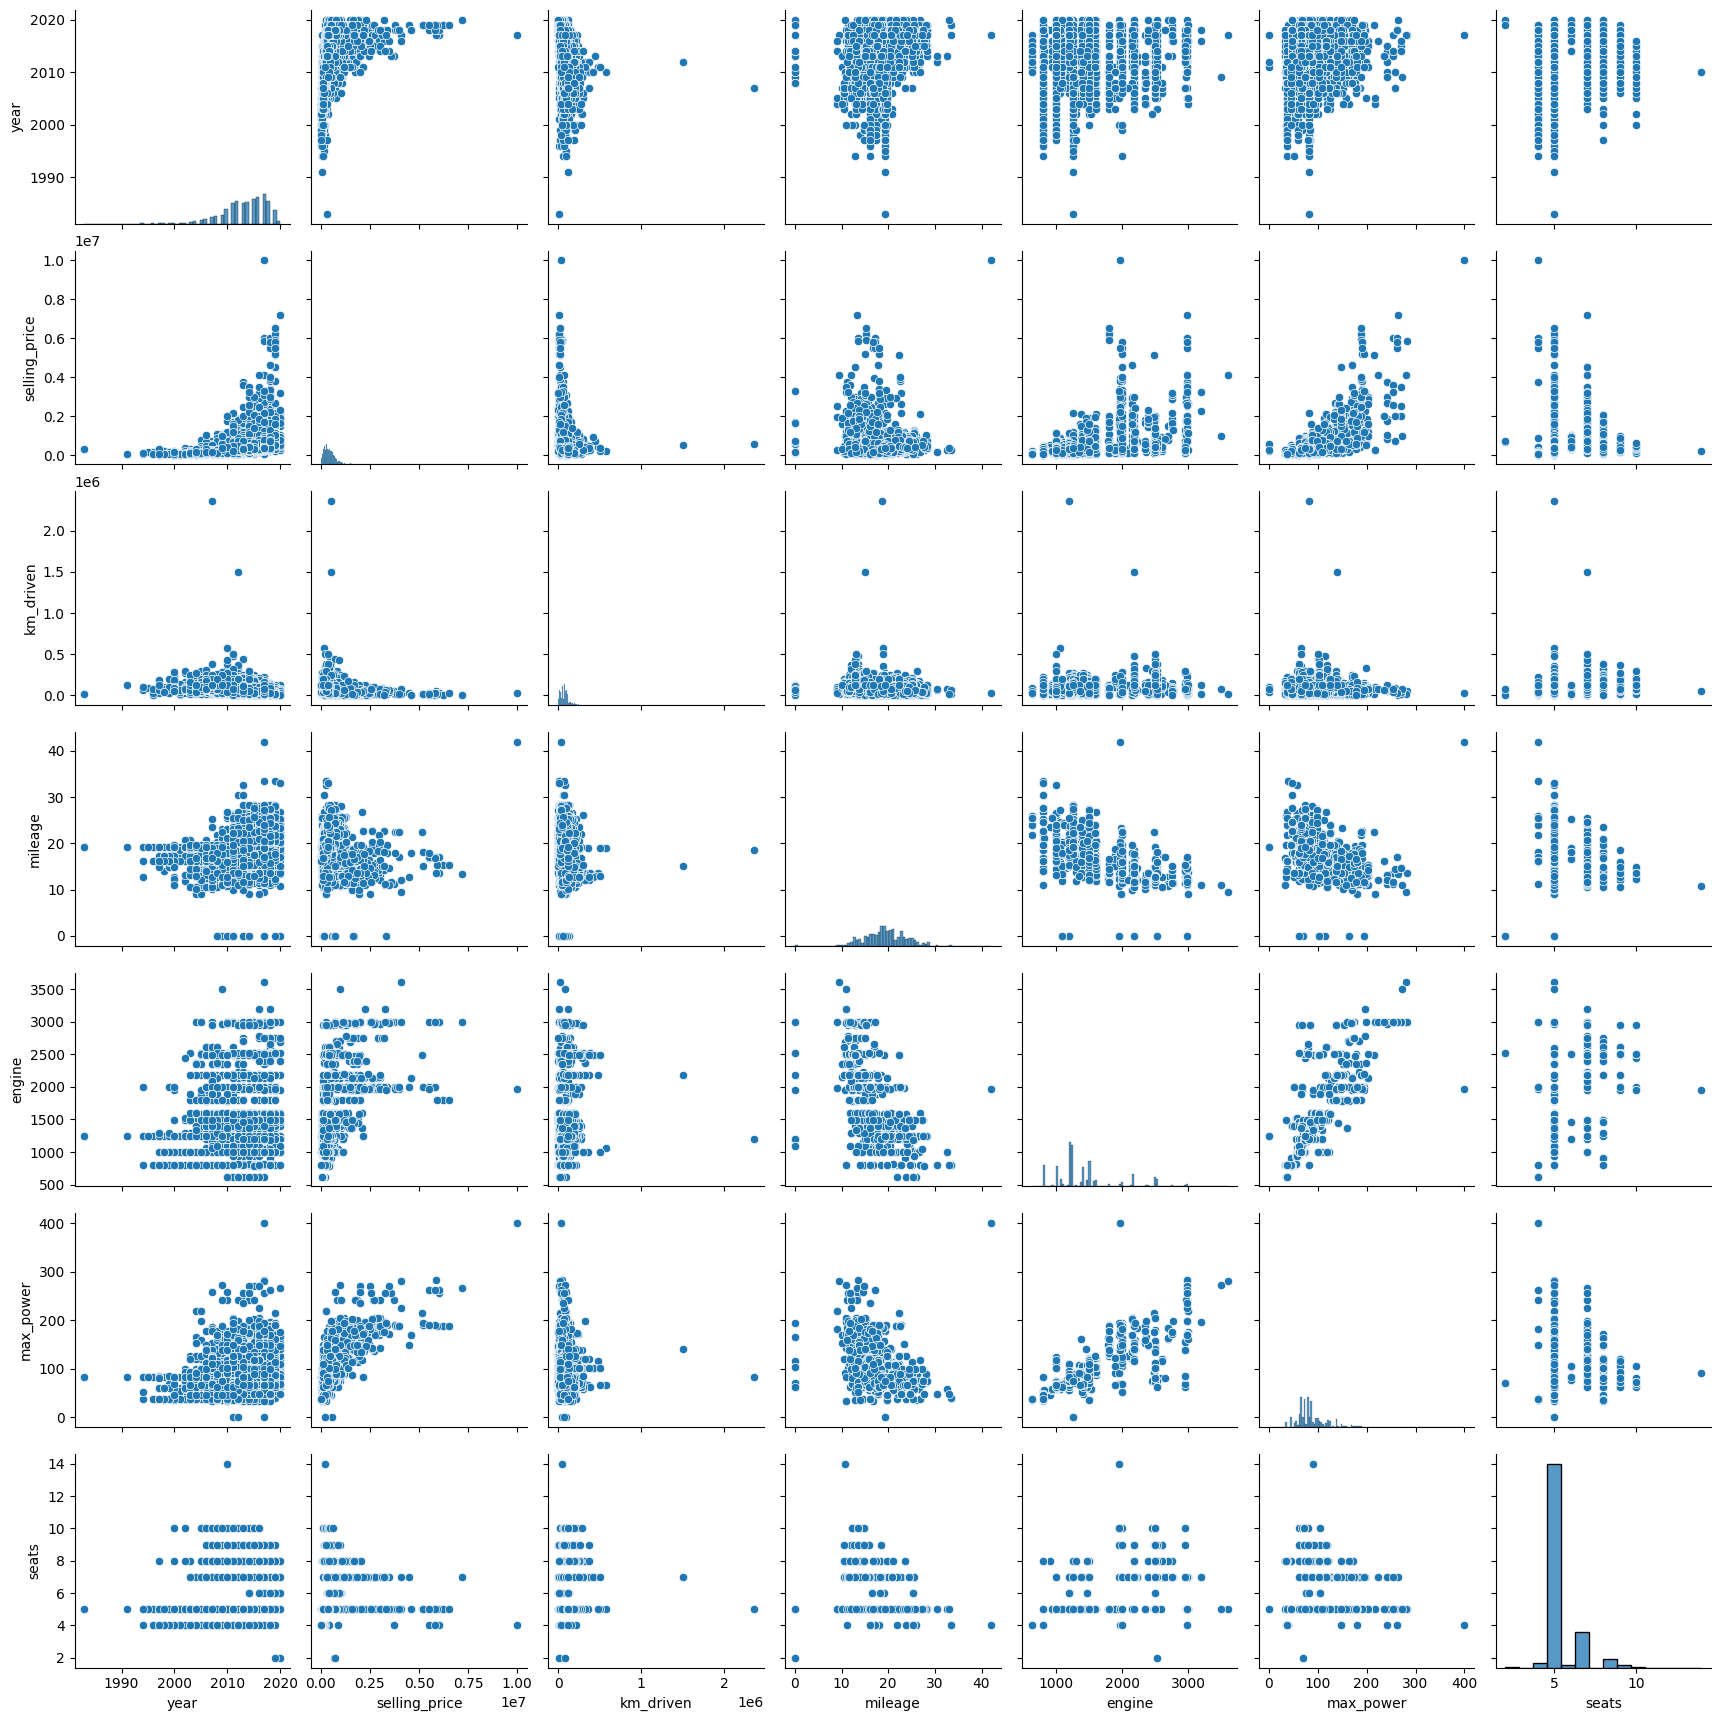

In [23]:
sns.pairplot(df_train)
plt.show()

[**Ответ**] По распределениям можно заметить похожую на линейную зависимость целевой переменной `selling_price` от `engine` и `max_power`, также видна корреляция между парами признаков `max_power`-`engine` (положительная) и `engine`-`mileage` (отрицательная)

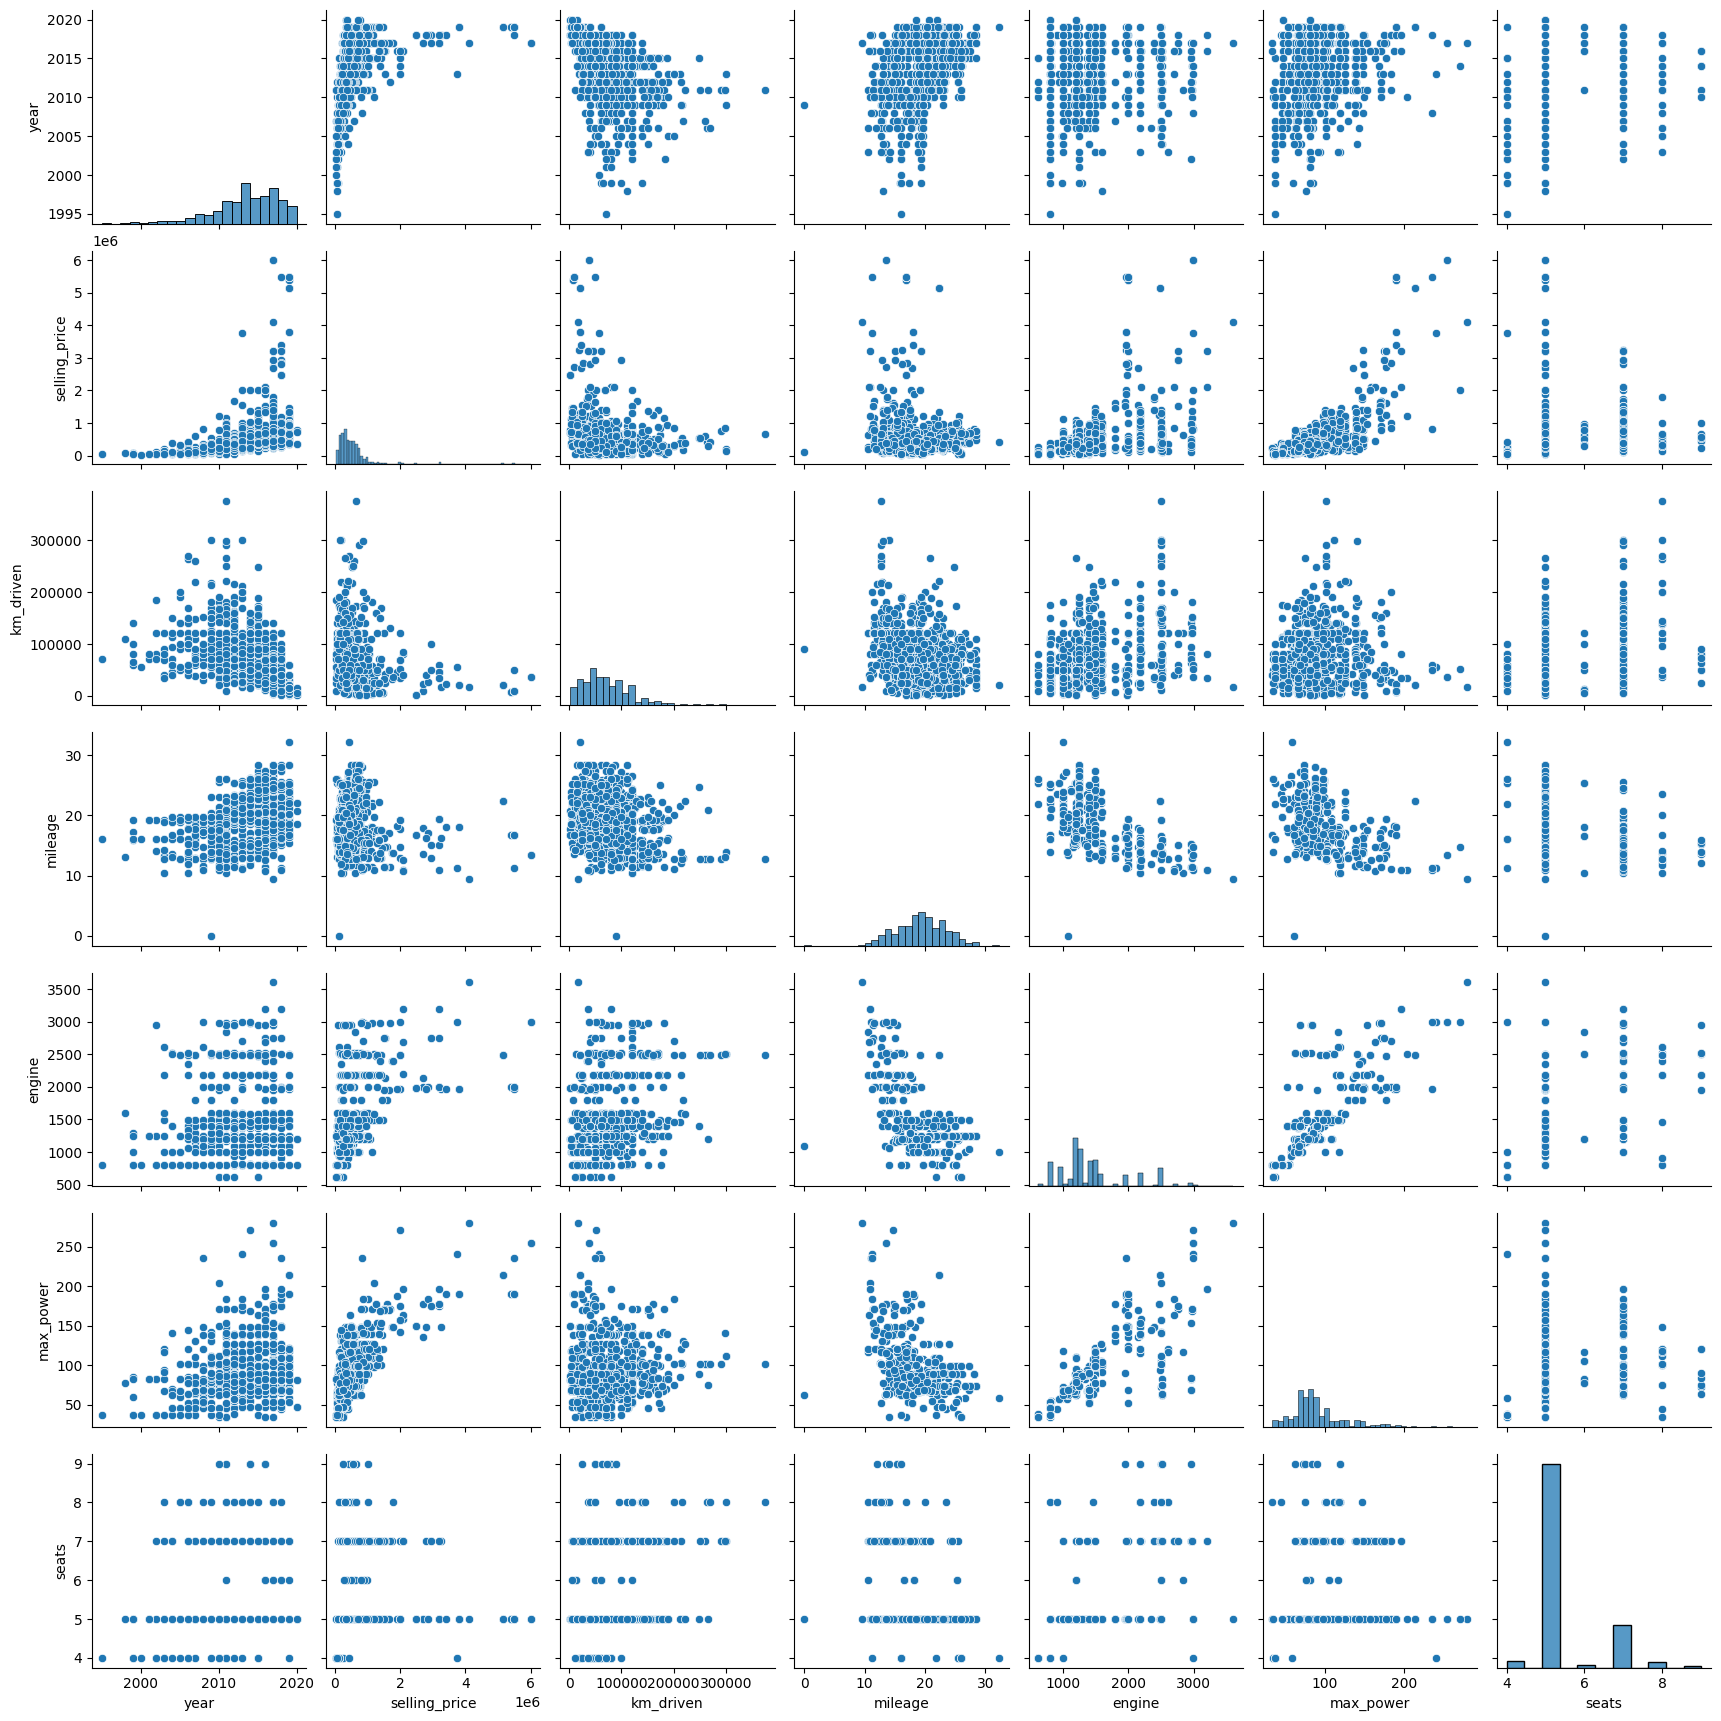

In [24]:
sns.pairplot(df_test)
plt.show()

[**Ответ**] Распределения на тесте похожи на распределения в тренировочных данных

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


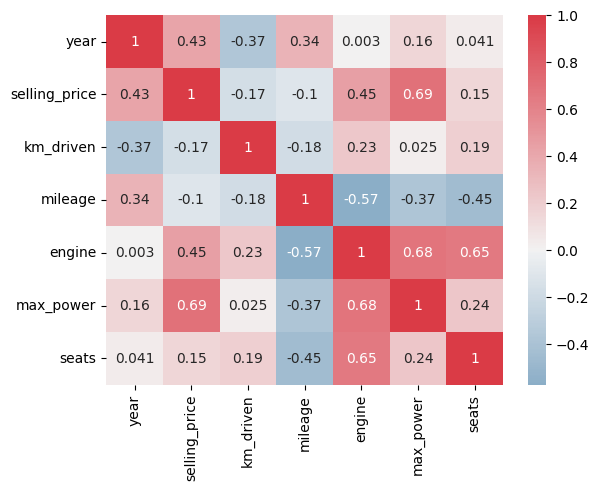

In [25]:
sns.heatmap(df_train.corr(numeric_only=True).round(3), cmap=sns.diverging_palette(240, 10, as_cmap=True), annot=True, center=0)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [26]:
df_train.corr(numeric_only=True).abs().stack().idxmin()

('year', 'engine')

In [27]:
df_train.corr(numeric_only=True) \
    .stack() \
    .reset_index() \
    .set_axis(['f1', 'f2', 'corr'], axis=1) \
    .loc[lambda df: df['f1']!=df['f2']] \
    .assign(f1f2=lambda df: df.apply(lambda row: ' '.join(sorted([row['f1'], row['f2']])), axis=1)) \
    .drop_duplicates(subset='f1f2') \
    .drop('f1f2', axis=1) \
    .sort_values('corr', key=lambda x: abs(x), ascending=False) \
    .round(2) \
    .head(10)

,f1,f2,corr
12,selling_price,max_power,0.69
33,engine,max_power,0.68
34,engine,seats,0.65
25,mileage,engine,-0.57
27,mileage,seats,-0.45
11,selling_price,engine,0.45
1,year,selling_price,0.43
26,mileage,max_power,-0.37
2,year,km_driven,-0.37
3,year,mileage,0.34


[**Ответ**]

- Наименее скоррелированы между собой признаки `year` и `engine` ($r=0.003$)
- Довольно сильная положительная линейная зависимости наблюдается между признаками `engine`-`max_power` ($r=0.68$) и `engine`-`seats` ($r=0.65$)
- Корреляция между `year` и `km_driven` не сильная, но достаточная, чтобы утверждать, что связь между переменными присутствует.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [28]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.4 MB/s eta 0:00:00


In [29]:
import phik

In [30]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


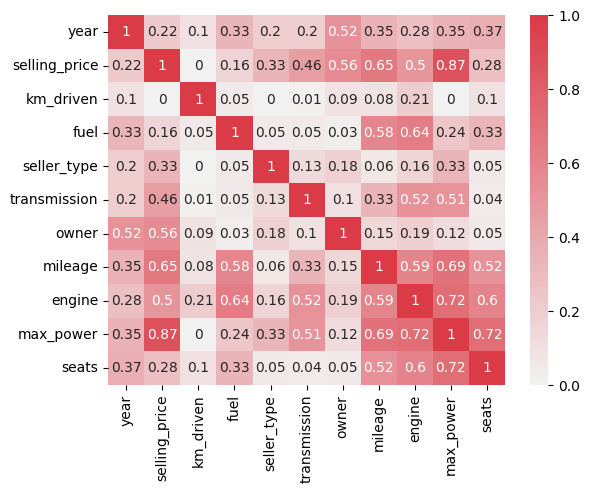

In [31]:
# мы не оценили связь между категориальными переменными и целевой переменной/другими признаками
# сделаем это при помощи phik (текстовую переменную 'name' отбросим)

sns.heatmap(phik.phik_matrix(df_train.drop('name', axis=1), interval_cols=['km_driven', 'selling_price', 'mileage', 'max_power', 'engine']).round(2), cmap=sns.diverging_palette(240, 10, as_cmap=True), annot=True, center=0)
plt.show()

[**Ответ**] Есть корреляция между целевой переменной `selling_price` и категориальными признаками `transmission` и `owner`, что можно подтвердить здравым смыслом: в общем случае авто с механической КПП дешевле, чем с автоматической, а авто с меньшим кол-во владельцев - дороже, чем с большим.

Также есть корреляция между парами признаков `owner`-`year` и `fuel`-`engine`

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [32]:
df_train_copy = df_train.select_dtypes('number')
df_test_copy = df_test.select_dtypes('number')

In [33]:
target_col = 'selling_price'

X_train = df_train_copy.drop(target_col, axis=1)
y_train = df_train_copy[target_col]

X_test = df_test_copy.drop(target_col, axis=1)
y_test = df_test_copy[target_col]

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.59
 MSE: 116,873,067,752

Test:
 R2: 0.59
 MSE: 233,297,548,205


[**Ответ**] Значения метрики `R2` одинаковы на трейне и на тесте ($0.59$) и свидетельствуют о среднем качестве модели. При этом значение `MSE` на тесте в 2 раза больше, чем на трейне, что может свидетельствовать о переобучении

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.59
 MSE: 116,873,067,752

Test:
 R2: 0.59
 MSE: 233,297,548,205


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [38]:
pd.Series(lr.coef_, index=scaler.get_feature_names_out()).abs().sort_values(ascending=False).head(1)

,0
max_power,322779.703236


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(X_train_scaled, y_train)

y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.59
 MSE: 116,873,067,762

Test:
 R2: 0.59
 MSE: 233,298,219,171


In [40]:
pd.Series(lasso.coef_, index=scaler.get_feature_names_out())

,0
year,152843.083853
km_driven,-44146.918538
mileage,28779.204085
engine,61172.025780
max_power,322780.586197
seats,-23217.693273


[**Ответ**] Качество практически не изменилось. Никакие веса не занулились: скорее всего этому препятствует слишком маленький коэффициент регуляризации по умолчанию $alpha=1$, который недостаточно сильно штрафует модель.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

gs_lasso = GridSearchCV(
    estimator=Lasso(max_iter=10**4),
    param_grid={'alpha': np.logspace(-1, 5, 10**3)},
    cv=KFold(n_splits=10),
    scoring='r2',
    refit=True)

In [42]:
%%time
gs_lasso.fit(X_train_scaled, y_train)

CPU times: user 51.4 s, sys: 203 ms, total: 51.6 s
Wall time: 1min 16s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-01, 1.01392541e-01, 1.02804473e-01, 1.04236067e-01,
       1.05687597e-01, 1.07159340e-01, 1.08651577e-01, 1.10164595e-01,
       1.11698682e-01, 1.13254132e-01, 1.14831241e-01, 1.16430313e-01,
       1.18051653e-01, 1.19695570e-01, 1.21362380e-01...
       7.27548353e+04, 7.37679760e+04, 7.47952252e+04, 7.58367791e+04,
       7.68928372e+04, 7.79636013e+04, 7.90492762e+04, 8.01500696e+04,
       8.12661920e+04, 8.23978568e+04, 8.35452806e+04, 8.47086827e+04,
       8.58882856e+04, 8.70843150e+04, 8.82969996e+04, 8.95265713e+04,
       9.07732653e+04, 9.20373200e+04, 9.33189772e+04, 9.46184819e+04,
       9.59360829e+04, 9.72720319e+04, 9.86265846e+04, 1.00000000e+05])},
             scoring='r2')

In [43]:
gs_lasso.best_params_, pd.Series(gs_lasso.best_estimator_.coef_, index=X_train.columns)

({'alpha': 26510.836019085364},
 year         145994.094846
 km_driven    -15797.499286
 mileage           0.000000
 engine            0.000000
 max_power    321899.609330
 seats            -0.000000
 dtype: float64)

In [44]:
y_pred_train = gs_lasso.predict(X_train_scaled)
y_pred_test = gs_lasso.predict(X_test_scaled)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.58
 MSE: 119,633,854,144

Test:
 R2: 0.56
 MSE: 250,269,294,873


[**Ответ**]
- Пришлось обучить $n\_folds*n\_alpha = 10*10^3=10^4$ моделей
- Лучшее подобранное $alpha \approx 26511$
- Качество модели не улучшилось, но регуляризация занулила веса при столбцах `mileage`, `engine` и `seats`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [45]:
from sklearn.linear_model import ElasticNet

gs_net = GridSearchCV(
    estimator=ElasticNet(),
    param_grid={'alpha': np.linspace(1e-2, 1e2, 200), 'l1_ratio': np.linspace(0.02, 0.98, 20)},
    cv=KFold(n_splits=10),
    scoring='r2',
    refit=True)

In [46]:
%%time
gs_net.fit(X_train_scaled, y_train)

CPU times: user 2min 16s, sys: 460 ms, total: 2min 16s
Wall time: 2min 21s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-02, 5.12462312e-01, 1.01492462e+00, 1.51738693e+00,
       2.01984925e+00, 2.52231156e+00, 3.02477387e+00, 3.52723618e+00,
       4.02969849e+00, 4.53216080e+00, 5.03462312e+00, 5.53708543e+00,
       6.03954774e+00, 6.54201005e+00, 7.04447236e+00, 7.546934...
       9.64827638e+01, 9.69852261e+01, 9.74876884e+01, 9.79901508e+01,
       9.84926131e+01, 9.89950754e+01, 9.94975377e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.02      , 0.07052632, 0.12105263, 0.17157895, 0.22210526,
       0.27263158, 0.32315789, 0.37368421, 0.42421053, 0.47473684,
       0.52526316, 0.57578947, 0.62631579, 0.67684211, 0.72736842,
       0.77789474, 0.82842105, 0.87894737, 0.92947368, 0.98      ])},
             scoring='r2')

In [47]:
gs_net.best_params_, pd.Series(gs_net.best_estimator_.coef_, index=X_train.columns)

({'alpha': 2.0198492462311552, 'l1_ratio': 0.9294736842105263},
 year         142889.713410
 km_driven    -46188.482757
 mileage       20704.958391
 engine        82101.327283
 max_power    268827.852795
 seats        -23227.281437
 dtype: float64)

In [48]:
y_pred_train = gs_net.predict(X_train_scaled)
y_pred_test = gs_net.predict(X_test_scaled)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.59
 MSE: 118,907,511,291

Test:
 R2: 0.56
 MSE: 251,128,391,653


[**Ответ**]
- Пришлось обучить $n\_folds*n\_alpha*n\_l1 = 10*200*20=4*10^4$ моделей
- Параметры лучшей модели: $alpha \approx 2, l1\_ratio \approx 0.93$

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [49]:
df_train['name']

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Hyundai i20 Sportz Diesel
3,Maruti Swift VXI BSIII
4,Hyundai Xcent 1.2 VTVT E Plus
...,...
5835,Hyundai Santro Xing GLS
5836,Maruti Wagon R VXI BS IV with ABS
5837,Hyundai i20 Magna
5838,Hyundai Verna CRDi SX


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [50]:
# попробуем вытащить марку авто из столбца 'name':
# поскольку быстро найти ресурс, откуда можно было бы спарсить все существующие марки для валидации, не получилось,
# будем исходить из предположения, что марка авто -- 1-е слово в столбце 'name'
# (марка авто не всегда состоит из одного слова, но марок, состоящих их 2-х и более слов при совпадающем 1-м, кажется, быть не должно)

df_train['name'].str.split().str[0].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [51]:
X_train_cat = df_train.drop(target_col, axis=1)
X_test_cat = df_test.drop(target_col, axis=1)

In [52]:
# закодируем при помощи TargetEncoder

from sklearn.preprocessing import TargetEncoder

tgt_enc = TargetEncoder(target_type='continuous')
tgt_enc.fit(X_train_cat['name'].str.split().str[0].to_frame(), y_train)

TargetEncoder(target_type='continuous')

In [53]:
X_train_cat['name_enc'] = tgt_enc.transform(X_train_cat['name'].str.split().str[0].to_frame())
X_test_cat['name_enc'] = tgt_enc.transform(X_test_cat['name'].str.split().str[0].to_frame())

X_train_cat = X_train_cat.drop('name', axis=1)
X_test_cat = X_test_cat.drop('name', axis=1)

In [54]:
assert X_train_cat.shape == (5840, 11)

In [55]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [56]:
X_train_cat['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [57]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

ohe.fit(X_train_cat[['seats']])

X_train_cat = pd.concat((X_train_cat, pd.DataFrame(ohe.transform(X_train_cat[['seats']]), columns=ohe.get_feature_names_out())), axis=1).drop('seats', axis=1)
X_test_cat = pd.concat((X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[['seats']]), columns=ohe.get_feature_names_out())), axis=1).drop('seats', axis=1)

X_train_cat.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,name_enc,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,388929.667662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,505570.698410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,452877.338520,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,388929.667662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,452877.338520,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [58]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.linear_model import Ridge

In [59]:
X_train = df_train.assign(name=lambda df: df['name'].str.split().str[0]).drop(target_col, axis=1)
X_test = df_test.assign(name=lambda df: df['name'].str.split().str[0]).drop(target_col, axis=1)

y_train = df_train[target_col]
y_test = df_test[target_col]

In [60]:
X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [61]:
X_train.dtypes

,0
name,object
year,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64
max_power,float64


In [62]:
column_transformer = ColumnTransformer(
    transformers=[('target', make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'), TargetEncoder(target_type='continuous'), StandardScaler()), ['name']),
                  ('ohe', make_pipeline(SimpleImputer(strategy='median'), OneHotEncoder(handle_unknown='ignore', drop='first')), ['seats']),
                  ('numeric', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), ['year', 'km_driven', 'mileage', 'engine', 'max_power'])])

column_transformer.fit(X_train, y_train)
pd.DataFrame(column_transformer.transform(X_train), columns=column_transformer.get_feature_names_out())

,target__name,ohe__seats_4.0,ohe__seats_5.0,ohe__seats_6.0,ohe__seats_7.0,ohe__seats_8.0,ohe__seats_9.0,ohe__seats_10.0,ohe__seats_14.0,numeric__year,numeric__km_driven,numeric__mileage,numeric__engine,numeric__max_power
0,-0.419315,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139570,1.191152,0.996413,-0.373643,-0.439701
1,-0.007262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139570,0.766619,0.429384,0.141162,0.493387
2,-0.193410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.837167,0.883158,0.896054,-0.068879,0.066037
3,-0.419315,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,0.766619,-0.835142,-0.270682,0.009142
4,-0.193410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872122,-0.482007,0.178486,-0.478663,-0.191257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-0.193410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.325535,1.948653,-0.378507,-0.707236,-0.815845
5836,-0.419315,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104614,-0.398765,-0.132627,-0.888447,-0.657801
5837,-0.193410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104614,0.600136,-0.232987,-0.478663,-0.159965
5838,-0.193410,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,0.749971,-0.659513,0.130865,0.698211


In [63]:
X_train_transformed = column_transformer.transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [64]:
gs_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid={'alpha': np.logspace(-3, 4, 10**3)},
    cv=KFold(n_splits=10),
    scoring='r2',
    refit=True)

In [65]:
%%time
gs_ridge.fit(X_train_transformed, y_train)

CPU times: user 1min, sys: 44.7 s, total: 1min 45s
Wall time: 1min 4s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.01626509e-03, 1.03279473e-03, 1.04959323e-03,
       1.06666496e-03, 1.08401436e-03, 1.10164595e-03, 1.11956432e-03,
       1.13777413e-03, 1.15628013e-03, 1.17508713e-03, 1.19420003e-03,
       1.21362380e-03, 1.23336350e-03, 1.25342427e-03, 1.27381132e-0...
       6.89983712e+03, 7.01206359e+03, 7.12611543e+03, 7.24202233e+03,
       7.35981448e+03, 7.47952252e+03, 7.60117762e+03, 7.72481145e+03,
       7.85045620e+03, 7.97814457e+03, 8.10790981e+03, 8.23978568e+03,
       8.37380654e+03, 8.51000725e+03, 8.64842328e+03, 8.78909065e+03,
       8.93204600e+03, 9.07732653e+03, 9.22497005e+03, 9.37501502e+03,
       9.52750047e+03, 9.68246612e+03, 9.83995230e+03, 1.00000000e+04])},
             scoring='r2')

In [66]:
y_pred_train = gs_ridge.predict(X_train_transformed)
y_pred_test = gs_ridge.predict(X_test_transformed)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.71
 MSE: 83,239,414,952

Test:
 R2: 0.76
 MSE: 140,006,887,141


[**Ответ**] Использование Ridge регрессии с добавлением закодированных категориальных признаков позволило значительно улучшить метрики как на трейне, так и на тесте

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [67]:
def business_metric(y_true, y_pred):
    return (np.abs((y_true - y_pred) / y_true) <= 0.1).sum() / len(y_true)

print(f'Lasso: {business_metric(y_test, gs_lasso.predict(X_test_scaled))}')
print(f'ElasticNet: {business_metric(y_test, gs_net.predict(X_test_scaled))}')
print(f'Ridge with encoded cat features: {business_metric(y_test, gs_ridge.predict(X_test_transformed))}')

Lasso: 0.233
ElasticNet: 0.243
Ridge with encoded cat features: 0.242


[**Ответ**] Не смотря на то, что модель Ridge оказалось значительно лучше остальных по метрике $R^2$, в рамках кастомной бизнес метрики модели практически не различимы (с отрывом $0.01$ выиграла модель ElasticNet)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [68]:
from sklearn.preprocessing import FunctionTransformer

In [69]:
# для инференса будем использовать модель Ridge с закодированными категориальными признаками,
# соберем пайплайн (чтобы было удобно сериализовать), в который добавим все трансформации, в т.ч. преобразование столбца 'name',
# и обучим его с подобранным через GridSearch гиперпараметром alpha

column_transformer = ColumnTransformer(
    transformers=[('name_target_enc', make_pipeline(FunctionTransformer(lambda df: df.apply(lambda x: x.astype('str').str.split().str[0]), feature_names_out='one-to-one'),
                                                    SimpleImputer(strategy='constant', fill_value='NA'),
                                                    TargetEncoder(target_type='continuous'),
                                                    StandardScaler()), ['name']),
                  ('ohe', make_pipeline(SimpleImputer(strategy='median'),
                                        OneHotEncoder(handle_unknown='ignore', drop='first')), ['seats']),
                  ('numeric', make_pipeline(SimpleImputer(strategy='median'),
                                            StandardScaler()), ['year', 'km_driven', 'mileage', 'engine', 'max_power'])],
    remainder='drop')

pipe = Pipeline(steps=[('transform', column_transformer), ('ridge', Ridge(**gs_ridge.best_params_))])
pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('name_target_enc',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function <lambda> at 0x793aa48f5fc0>)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('targetencoder',
                                                                   TargetEncoder(target_type='continuous')),
                                                                  ('standards...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['seats']),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['year', 'km_driven',
                                                   'mileage', 'engine',
                                                   'max_power'])])),
                ('ridge', Ridge(alpha=5.698437059469142))])

In [70]:
# пример работы итогового трансформера

X_train = df_train.drop(target_col, axis=1)
y_train = df_train[target_col]
X_test = df_test.drop(target_col, axis=1)
y_test = df_test[target_col]

column_transformer.fit(X_train, y_train)
pd.DataFrame(column_transformer.transform(X_train), columns=column_transformer.get_feature_names_out())

,name_target_enc__name,ohe__seats_4.0,ohe__seats_5.0,ohe__seats_6.0,ohe__seats_7.0,ohe__seats_8.0,ohe__seats_9.0,ohe__seats_10.0,ohe__seats_14.0,numeric__year,numeric__km_driven,numeric__mileage,numeric__engine,numeric__max_power
0,-0.414851,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139570,1.191152,0.996413,-0.373643,-0.439701
1,-0.008906,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139570,0.766619,0.429384,0.141162,0.493387
2,-0.192295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.837167,0.883158,0.896054,-0.068879,0.066037
3,-0.414851,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,0.766619,-0.835142,-0.270682,0.009142
4,-0.192295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872122,-0.482007,0.178486,-0.478663,-0.191257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-0.192295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.325535,1.948653,-0.378507,-0.707236,-0.815845
5836,-0.414851,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104614,-0.398765,-0.132627,-0.888447,-0.657801
5837,-0.192295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104614,0.600136,-0.232987,-0.478663,-0.159965
5838,-0.192295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,0.749971,-0.659513,0.130865,0.698211


In [71]:
# проверим, что качество модели сохранилось

pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train:\n', f'R2: {r2_score(y_train, y_pred_train):.2f}\n', f'MSE: {MSE(y_train, y_pred_train):,.0f}\n')
print('Test:\n', f'R2: {r2_score(y_test, y_pred_test):.2f}\n', f'MSE: {MSE(y_test, y_pred_test):,.0f}')

Train:
 R2: 0.71
 MSE: 83,275,624,667

Test:
 R2: 0.76
 MSE: 138,175,227,220


In [72]:
from google.colab import files
import cloudpickle

filename = '/content/car_price_ridge_model.cloudpickle'

with open(filename, 'wb') as f:
    cloudpickle.dump(pipe, f)

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Гипотеза: сэр кот - товарищ `@janinaal` 🛸